# Data Visualisation

In [1]:
#importing libraries
import numpy as np
import pandas as pd


In [2]:
#reading the datafile
bike_rental=pd.read_csv('day.csv')
bike_rental.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Perform EDA to understand various variables and dropping unused variables

In [3]:
#To find no of columns
bike_rental.shape

(730, 16)

In [4]:
#Getting basic info on dataset and the datatypes
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_rental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Finding null values if any
bike_rental.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#Ignoring or dropping unused columns{instant,dteday,casual,registered}
bike_rental.drop('instant',axis = 1,inplace = True)#dropping since its like row no
bike_rental.drop('dteday',axis = 1,inplace = True)#date is covered in other variables
bike_rental.drop('casual',axis = 1,inplace = True)#casual and registered is expressed as sum in cnt so dropping those
bike_rental.drop('registered',axis = 1,inplace = True)

In [8]:
#viewing after dropping unused variables
bike_rental.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


Check the correlation between the variables

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
corr_ = bike_rental.corr() #correlation matrix

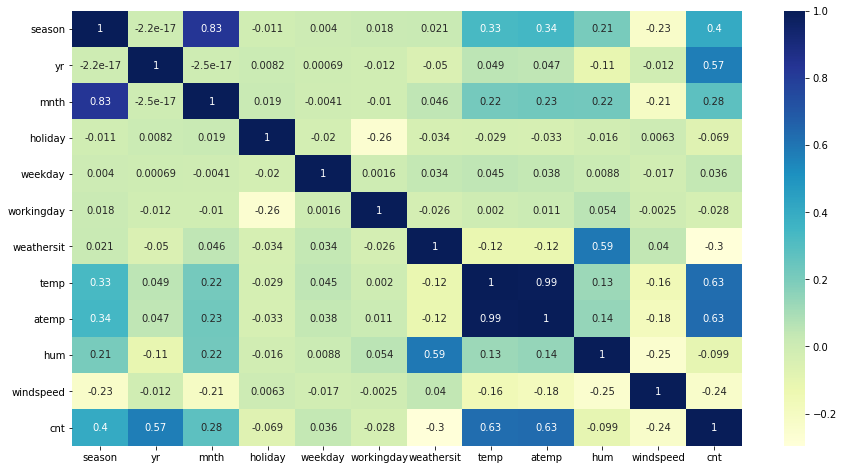

In [11]:
plt.figure(figsize=[15,8])
sns.heatmap(corr_,cmap='YlGnBu',linecolor='black',annot=True) #correlation plot

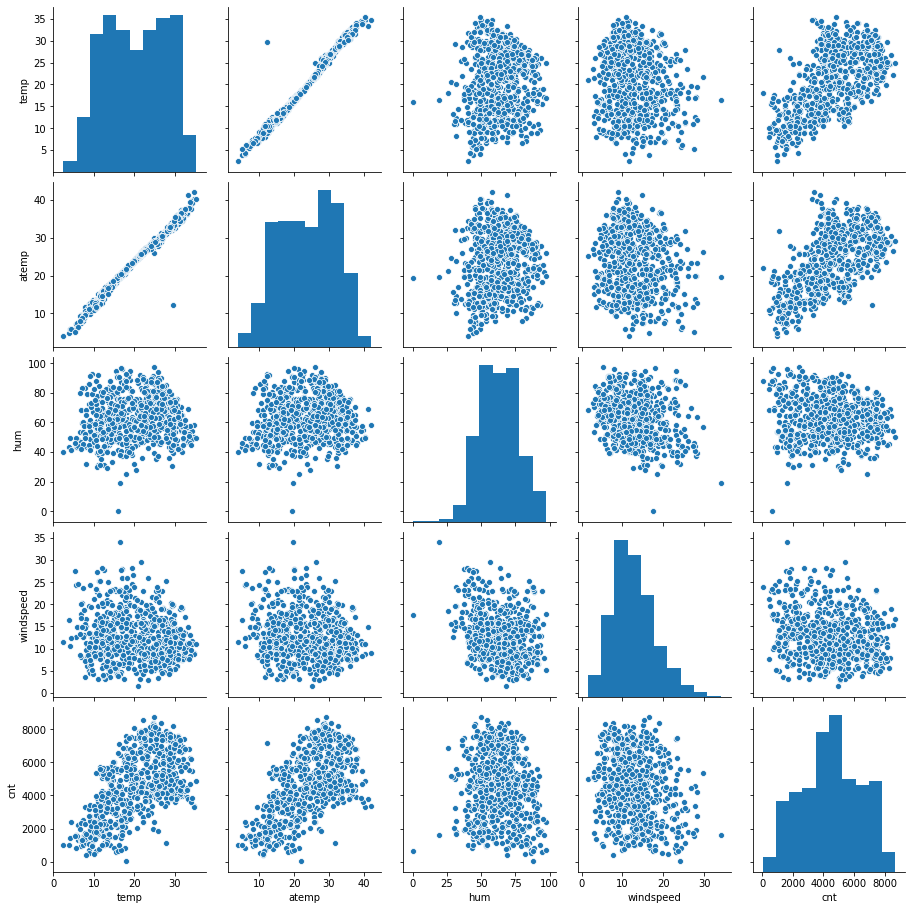

In [12]:
#visualising numerical variables
sns.pairplot(data = bike_rental, vars = ["temp","atemp","hum","windspeed","cnt"])
plt.show()

There exists positive correlation in atleast 3 variables, so performing a Linear regression is suitable with this dataset.

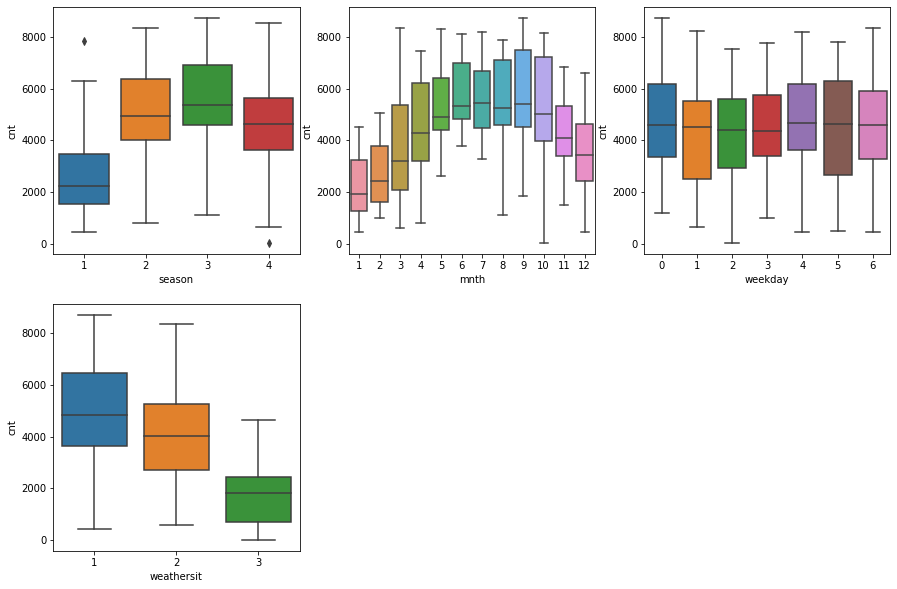

In [13]:
#visualising categorical variables
plt.figure(figsize=[15,10])
plt.subplot(2,3,1)
sns.boxplot(x= 'season', y= 'cnt', data=bike_rental)
plt.subplot(2,3,2)
sns.boxplot(x= 'mnth', y= 'cnt', data=bike_rental)
plt.subplot(2,3,3)
sns.boxplot(x= 'weekday', y= 'cnt', data=bike_rental)
plt.subplot(2,3,4)
sns.boxplot(x= 'weathersit', y= 'cnt', data=bike_rental)
plt.show()

Some infernces from above visualisation includes:
    In season 3 bike rentals are comparitively high that is especially in september and october month
    Towards weekends rentals are getting higher compared to the weekdays
    Clear and cloudy day only rentals are high compared to all other weather situations
    

# Data preparation

#Mapping the categorical variables

In [14]:
bike_rental[['season']] = bike_rental[['season']].apply(lambda x: x.map({ 1 : 'Spring',2 : 'Summer', 3 : 'Fall', 4 : 'Winter'}))
bike_rental[['mnth']] = bike_rental[['mnth']].apply(lambda x: x.map({ 1 :'Jan', 2 :'feb', 3 :'Mar', 4 :'Apr', 5 :'May',6: 'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11: 'Nov', 12 :'Dec'}))
bike_rental[['weekday']] = bike_rental[['weekday']].apply(lambda x: x.map({ 0 :'Sun', 1 : 'mon', 2 :'Tue' , 3 :'Wed', 4: 'Thu',5:'Fri',6:'Sat'}))
bike_rental[['weathersit']] = bike_rental[['weathersit']].apply(lambda x: x.map({1:'Clear', 2 : 'Mist', 3 :'Light snow rain'}))

In [15]:
#viewing dataset after mapping
bike_rental.head(100)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Summer,0,Apr,0,Fri,1,Clear,16.024153,19.38040,47.0833,17.625221,2808
96,Summer,0,Apr,0,Sat,0,Clear,17.937500,21.68480,60.2917,10.874904,3141
97,Summer,0,Apr,0,Sun,0,Mist,13.769153,16.22395,83.6250,15.208464,1471
98,Summer,0,Apr,0,mon,1,Mist,14.042500,17.07645,87.7500,8.916561,2455


In [16]:
#Creating dummy variables for category season
season_dummy=pd.get_dummies(bike_rental['season'],drop_first = True)
season_dummy

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [17]:
#concatinating with origina;l dataset
bike_rental= pd.concat([bike_rental,season_dummy],axis=1)
bike_rental.head(100)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,Jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,Spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Summer,0,Apr,0,Fri,1,Clear,16.024153,19.38040,47.0833,17.625221,2808,0,1,0
96,Summer,0,Apr,0,Sat,0,Clear,17.937500,21.68480,60.2917,10.874904,3141,0,1,0
97,Summer,0,Apr,0,Sun,0,Mist,13.769153,16.22395,83.6250,15.208464,1471,0,1,0
98,Summer,0,Apr,0,mon,1,Mist,14.042500,17.07645,87.7500,8.916561,2455,0,1,0


In [18]:
#Dropping the Column Season
bike_rental = bike_rental.drop('season', axis = 1)
bike_rental.head(100)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,Jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,Apr,0,Fri,1,Clear,16.024153,19.38040,47.0833,17.625221,2808,0,1,0
96,0,Apr,0,Sat,0,Clear,17.937500,21.68480,60.2917,10.874904,3141,0,1,0
97,0,Apr,0,Sun,0,Mist,13.769153,16.22395,83.6250,15.208464,1471,0,1,0
98,0,Apr,0,mon,1,Mist,14.042500,17.07645,87.7500,8.916561,2455,0,1,0


In [19]:
#Creating dummy variables for weekday
wkdy_dummy=pd.get_dummies(bike_rental['weekday'],drop_first = True)
wkdy_dummy

,Sat,Sun,Thu,Tue,Wed,mon
0,0,0,0,0,0,1
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
725,0,0,0,0,0,0
726,1,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,0,0,0,1


In [20]:
#concatinating it with original dataset
bike_rental= pd.concat([bike_rental,wkdy_dummy],axis=1)
bike_rental.head(100)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Sat,Sun,Thu,Tue,Wed,mon
0,0,Jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,0,1
1,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0
2,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0
3,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,1,0,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,Apr,0,Fri,1,Clear,16.024153,19.38040,47.0833,17.625221,2808,0,1,0,0,0,0,0,0,0
96,0,Apr,0,Sat,0,Clear,17.937500,21.68480,60.2917,10.874904,3141,0,1,0,1,0,0,0,0,0
97,0,Apr,0,Sun,0,Mist,13.769153,16.22395,83.6250,15.208464,1471,0,1,0,0,1,0,0,0,0
98,0,Apr,0,mon,1,Mist,14.042500,17.07645,87.7500,8.916561,2455,0,1,0,0,0,0,0,0,1


In [21]:
#Dropping the weekday column from original dataset
bike_rental = bike_rental.drop('weekday', axis = 1)
bike_rental.head(100)

,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Sat,Sun,Thu,Tue,Wed,mon
0,0,Jan,0,1,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,0,1
1,0,Jan,0,1,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0
2,0,Jan,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0
3,0,Jan,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,1,0,0,0
4,0,Jan,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,Apr,0,1,Clear,16.024153,19.38040,47.0833,17.625221,2808,0,1,0,0,0,0,0,0,0
96,0,Apr,0,0,Clear,17.937500,21.68480,60.2917,10.874904,3141,0,1,0,1,0,0,0,0,0
97,0,Apr,0,0,Mist,13.769153,16.22395,83.6250,15.208464,1471,0,1,0,0,1,0,0,0,0
98,0,Apr,0,1,Mist,14.042500,17.07645,87.7500,8.916561,2455,0,1,0,0,0,0,0,0,1


In [22]:
#creating dummy variable for month column
month_dummy=pd.get_dummies(bike_rental['mnth'],drop_first = True)
month_dummy

,Aug,Dec,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,feb
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [23]:
#concatenating it with original dataset
bike_rental= pd.concat([bike_rental,month_dummy],axis=1)
bike_rental.head(100)

,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Dec,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,feb
0,0,Jan,0,1,Mist,14.110847,18.18125,80.5833,10.749882,985,...,0,1,0,0,0,0,0,0,0,0
1,0,Jan,0,1,Mist,14.902598,17.68695,69.6087,16.652113,801,...,0,1,0,0,0,0,0,0,0,0
2,0,Jan,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,1,0,0,0,0,0,0,0,0
3,0,Jan,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,1,0,0,0,0,0,0,0,0
4,0,Jan,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,Apr,0,1,Clear,16.024153,19.38040,47.0833,17.625221,2808,...,0,0,0,0,0,0,0,0,0,0
96,0,Apr,0,0,Clear,17.937500,21.68480,60.2917,10.874904,3141,...,0,0,0,0,0,0,0,0,0,0
97,0,Apr,0,0,Mist,13.769153,16.22395,83.6250,15.208464,1471,...,0,0,0,0,0,0,0,0,0,0
98,0,Apr,0,1,Mist,14.042500,17.07645,87.7500,8.916561,2455,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#Dropping the mnth column from original dataset
bike_rental = bike_rental.drop('mnth', axis = 1)
bike_rental.head(100)

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,...,Dec,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,feb
0,0,0,1,Mist,14.110847,18.18125,80.5833,10.749882,985,1,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,Mist,14.902598,17.68695,69.6087,16.652113,801,1,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,1,Clear,16.024153,19.38040,47.0833,17.625221,2808,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,Clear,17.937500,21.68480,60.2917,10.874904,3141,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,Mist,13.769153,16.22395,83.6250,15.208464,1471,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,1,Mist,14.042500,17.07645,87.7500,8.916561,2455,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#creating the dummy variable for weather situation
weathersit_dummy=pd.get_dummies(bike_rental['weathersit'],drop_first = True)
weathersit_dummy

,Light snow rain,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [26]:
#concatenating weathersit with original dataset
bike_rental= pd.concat([bike_rental,weathersit_dummy],axis=1)
bike_rental.head(100)

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,...,Jul,Jun,Mar,May,Nov,Oct,Sep,feb,Light snow rain,Mist
0,0,0,1,Mist,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,Mist,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,1,Clear,16.024153,19.38040,47.0833,17.625221,2808,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,Clear,17.937500,21.68480,60.2917,10.874904,3141,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,Mist,13.769153,16.22395,83.6250,15.208464,1471,0,...,0,0,0,0,0,0,0,0,0,1
98,0,0,1,Mist,14.042500,17.07645,87.7500,8.916561,2455,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
#Dropping wdathersit from original dataset
bike_rental = bike_rental.drop('weathersit', axis = 1)
bike_rental.head(100)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Jul,Jun,Mar,May,Nov,Oct,Sep,feb,Light snow rain,Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,1,16.024153,19.38040,47.0833,17.625221,2808,0,1,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,17.937500,21.68480,60.2917,10.874904,3141,0,1,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,13.769153,16.22395,83.6250,15.208464,1471,0,1,...,0,0,0,0,0,0,0,0,0,1
98,0,0,1,14.042500,17.07645,87.7500,8.916561,2455,0,1,...,0,0,0,0,0,0,0,0,0,1


# Splitting the Data into Training and Testing Sets

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [29]:
#train test split
from sklearn.model_selection import train_test_split
np.random.seed(0)
bike_rental_train, bike_rental_test = train_test_split(bike_rental, train_size = 0.7, test_size = 0.3, random_state = 100)

# Scaling the variables


In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum', 'windspeed','cnt']

bike_rental_train[num_vars] = scaler.fit_transform(bike_rental_train[num_vars])

In [33]:
bike_rental_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Jul,Jun,Mar,May,Nov,Oct,Sep,feb,Light snow rain,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,1,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,1


In [34]:
bike_rental_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Jul,Jun,Mar,May,Nov,Oct,Sep,feb,Light snow rain,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.066667,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.249689,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


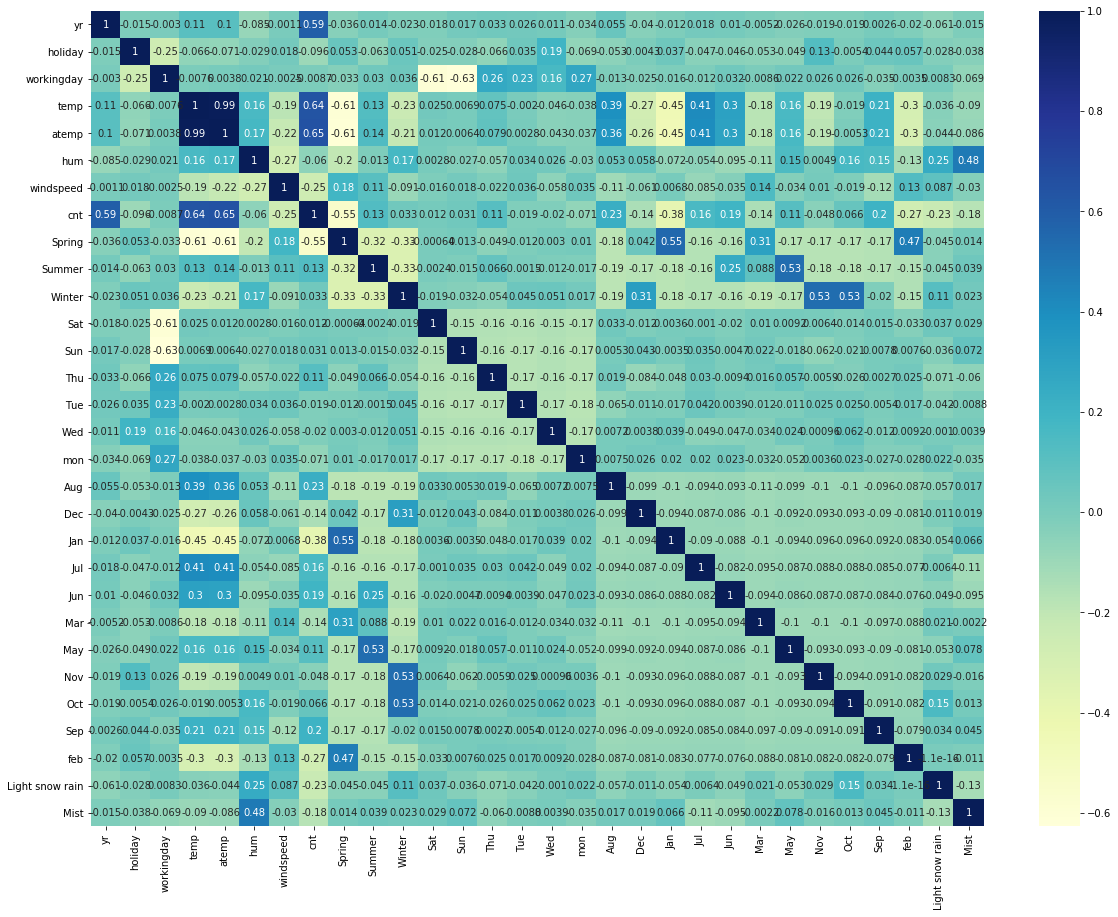

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 15))
sns.heatmap(bike_rental_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Dividing into X and Y sets for the model building

In [36]:
#following is the process of building model using all available variables
y_train = bike_rental_train.pop('cnt')
X_train = bike_rental_train

# RFE
Recursive feature elimination

In [37]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('mon', False, 9),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('feb', False, 2),
 ('Light snow rain', True, 1),
 ('Mist', True, 1)]

In [40]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light snow rain', 'Mist'],
      dtype='object')

In [41]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'mon', 'Aug',
       'Jun', 'Mar', 'May', 'Oct', 'feb'],
      dtype='object')

# Model preparation

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [43]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [44]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [45]:
# Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          3.34e-189
Time:                        15:02:34   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3202      0.036     

In [46]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep',
       'Light snow rain', 'Mist'],
      dtype='object')

In [47]:
X_train_rfe= X_train_rfe.drop(['const'], axis=1)

In [48]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,Spring,4.37
7,Winter,4.06
6,Summer,2.81
14,Mist,2.32
0,yr,2.09
11,Nov,1.83
9,Jan,1.75


# Model no 2

In [49]:
X_train_2 = X_train_rfe.drop(["hum"], axis = 1)#due to high vif value 

In [50]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_2)

In [51]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [52]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          1.57e-186
Time:                        15:27:57   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2466      0.032     

In [53]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,Winter,2.94
4,Spring,2.89
5,Summer,2.23
0,yr,2.07
10,Nov,1.80
8,Jan,1.66
9,Jul,1.59
13,Mist,1.56


# Model no 3

In [54]:
X_train_3 = X_train_2.drop(["temp"], axis = 1)#due to high vif value 

In [55]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_3)

In [56]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [57]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          5.50e-160
Time:                        15:33:59   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5961      0.016     

# Model no 4

In [59]:
X_train_4 = X_train_3.drop(["Winter"], axis = 1)#due to high P value 

In [60]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_4)

In [61]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [62]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     157.7
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          8.92e-161
Time:                        15:43:38   Log-Likelihood:                 438.93
No. Observations:                 510   AIC:                            -851.9
Df Residuals:                     497   BIC:                            -796.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5871      0.014     

# Model 5

In [63]:
X_train_5 = X_train_4.drop(["Jul"], axis = 1)#due to high P value

In [64]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_5)

In [65]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [66]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.3
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          7.42e-162
Time:                        15:46:34   Log-Likelihood:                 438.82
No. Observations:                 510   AIC:                            -853.6
Df Residuals:                     498   BIC:                            -802.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5845      0.013     

In [67]:
# Calculate the VIFs for the final model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.22
3,Spring,2.36
0,yr,1.74
4,Summer,1.69
6,Jan,1.62
10,Mist,1.47
7,Nov,1.23
8,Sep,1.16
5,Dec,1.13
1,holiday,1.06


# Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [68]:
y_train_cnt = lm.predict(X_train_lm)

In [69]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

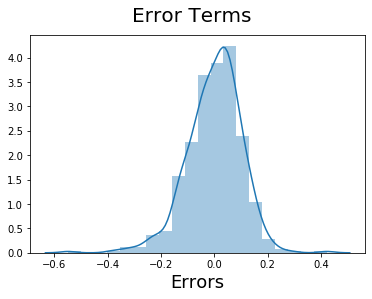

In [71]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Making Predictions

In [72]:
#Applying scaling on the test sets
num_vars = ['temp','atemp','hum', 'windspeed','cnt']

bike_rental_test[num_vars] = scaler.transform(bike_rental_test[num_vars])

In [74]:
#Divivding into X_test and y_test
y_test = bike_rental_test.pop('cnt')
X_test = bike_rental_test

In [77]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_5.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [78]:
# Making predictions
y_pred = lm.predict(X_test_new)

# Model Evaluation

Text(0, 0.5, 'y_pred')

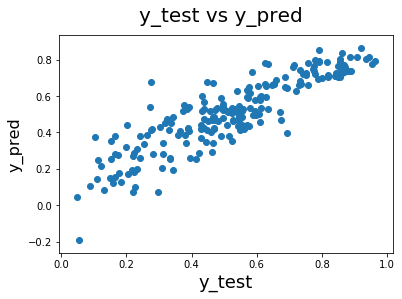

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### We can see that the equation of our best fitted line is:

cnt = (0.245×yr) - (0.085×holiday) - (0.19×windspeed) - (0.023×spring) - (0.39×summer) - (0.11×Dec) - (0.12×Jan) - (0.11×Nov) + (0.060×sep) − (0.316×light snow rain) - (0.088×Mist)

In [81]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7772012091843701

# the R-squared score on the test set is 0.78